

```
## Sentence Auto Completion using Deep learing algorithms **bold text**
```



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('/content/sentence_auto_completion_dataset.csv')




In [2]:
# Display the first few rows
print(df.head())





             incomplete_sentence                  completion
0            The quick brown fox    jumps over the lazy dog.
1                      She sells  seashells by the seashore.
2  A journey of a thousand miles  begins with a single step.
3             To be or not to be       that is the question.
4       All that glitters is not                       gold.


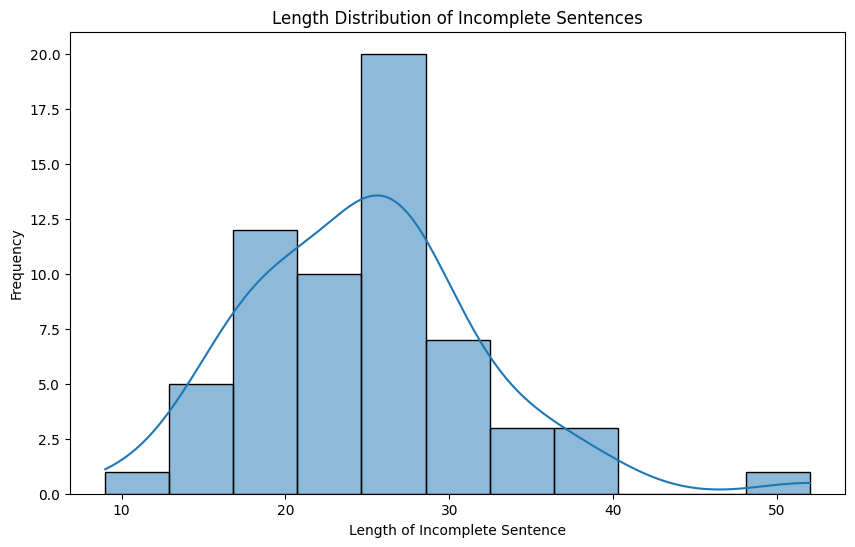

In [3]:
# Plot the length distribution of the incomplete sentences
df['incomplete_length'] = df['incomplete_sentence'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['incomplete_length'], kde=True)
plt.title('Length Distribution of Incomplete Sentences')
plt.xlabel('Length of Incomplete Sentence')
plt.ylabel('Frequency')
plt.show()


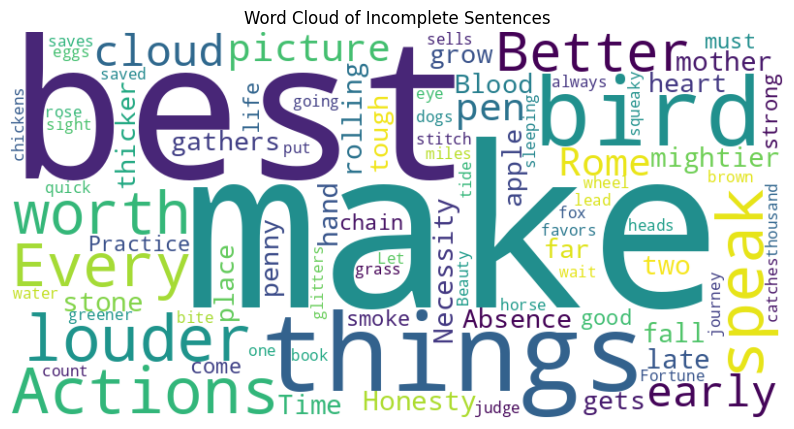

In [4]:
# Generate a word cloud
text = ' '.join(df['incomplete_sentence'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Incomplete Sentences')
plt.show()

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['incomplete_sentence'])
sequences = tokenizer.texts_to_sequences(df['incomplete_sentence'])
max_len = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Tokenize the completions
tokenizer.fit_on_texts(df['completion'])
y = tokenizer.texts_to_sequences(df['completion'])
y = pad_sequences(y, maxlen=max_len, padding='post')
y = np.array(y)

# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1


LSTM model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, validation_split=0.2)


Epoch 1/10
2/2 [==============================] - 3s 629ms/step - loss: 5.1827 - accuracy: 0.1565 - val_loss: 5.1373 - val_accuracy: 0.8526
Epoch 2/10
2/2 [==============================] - 0s 49ms/step - loss: 5.1308 - accuracy: 0.8265 - val_loss: 5.0740 - val_accuracy: 0.9103
Epoch 3/10
2/2 [==============================] - 0s 48ms/step - loss: 5.0690 - accuracy: 0.8741 - val_loss: 4.9903 - val_accuracy: 0.9103
Epoch 4/10
2/2 [==============================] - 0s 52ms/step - loss: 4.9850 - accuracy: 0.8741 - val_loss: 4.8671 - val_accuracy: 0.9103
Epoch 5/10
2/2 [==============================] - 0s 50ms/step - loss: 4.8601 - accuracy: 0.8741 - val_loss: 4.6725 - val_accuracy: 0.9103
Epoch 6/10
2/2 [==============================] - 0s 48ms/step - loss: 4.6588 - accuracy: 0.8741 - val_loss: 4.3488 - val_accuracy: 0.9103
Epoch 7/10
2/2 [==============================] - 0s 49ms/step - loss: 4.3227 - accuracy: 0.8741 - val_loss: 3.8110 - val_accuracy: 0.9103
Epoch 8/10
2/2 [==========

GRU model

In [7]:
from tensorflow.keras.layers import GRU

# Build the GRU model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    GRU(128, return_sequences=True),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, validation_split=0.2)


Epoch 1/10
2/2 [==============================] - 3s 578ms/step - loss: 5.1875 - accuracy: 0.0306 - val_loss: 5.1232 - val_accuracy: 0.8333
Epoch 2/10
2/2 [==============================] - 0s 63ms/step - loss: 5.1137 - accuracy: 0.8163 - val_loss: 5.0392 - val_accuracy: 0.9167
Epoch 3/10
2/2 [==============================] - 0s 63ms/step - loss: 5.0333 - accuracy: 0.8759 - val_loss: 4.9373 - val_accuracy: 0.9103
Epoch 4/10
2/2 [==============================] - 0s 87ms/step - loss: 4.9320 - accuracy: 0.8741 - val_loss: 4.8025 - val_accuracy: 0.9103
Epoch 5/10
2/2 [==============================] - 0s 84ms/step - loss: 4.7966 - accuracy: 0.8741 - val_loss: 4.6142 - val_accuracy: 0.9103
Epoch 6/10
2/2 [==============================] - 0s 86ms/step - loss: 4.6069 - accuracy: 0.8741 - val_loss: 4.3396 - val_accuracy: 0.9103
Epoch 7/10
2/2 [==============================] - 0s 81ms/step - loss: 4.3278 - accuracy: 0.8741 - val_loss: 3.9203 - val_accuracy: 0.9103
Epoch 8/10
2/2 [==========

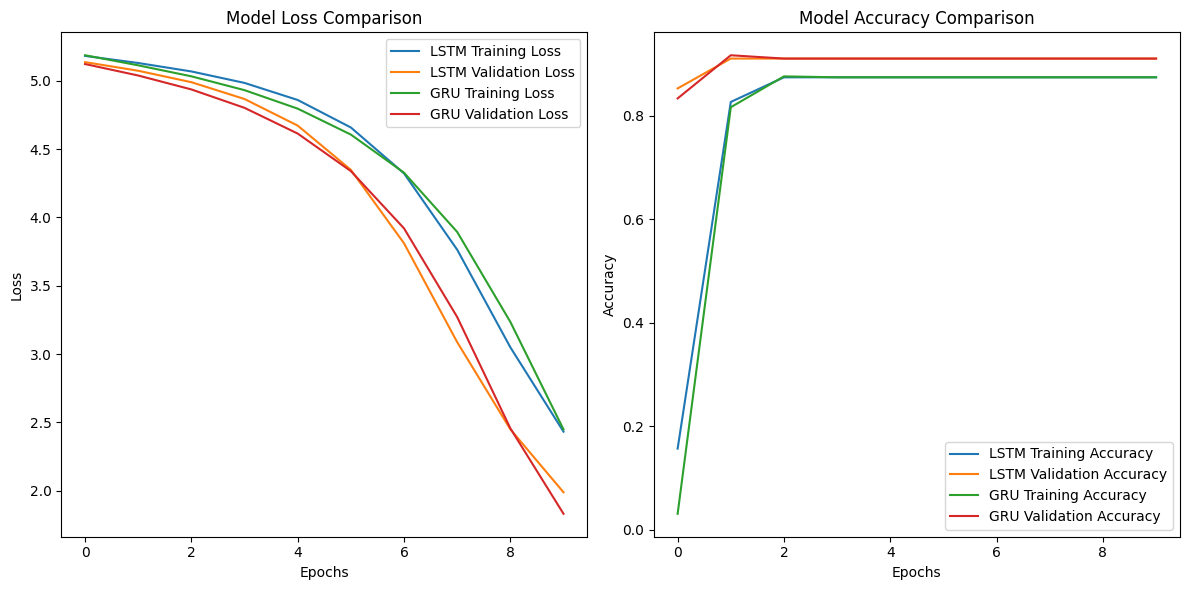

In [11]:
import matplotlib.pyplot as plt

# Assuming you have stored the history of LSTM and GRU models in variables `history_lstm` and `history_gru`
# Let's mock some data for history_lstm and history_gru for demonstration purposes
history_lstm = {
    'loss': [5.1827, 5.1308, 5.0690, 4.9850, 4.8601, 4.6588, 4.3227, 3.7642, 3.0498, 2.4324],
    'val_loss': [5.1373, 5.0740, 4.9903, 4.8671, 4.6725, 4.3488, 3.8110, 3.0875, 2.4498, 1.9887],
    'accuracy': [0.1565, 0.8265, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741],
    'val_accuracy': [0.8526, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103]
}

history_gru = {
    'loss': [5.1875, 5.1137, 5.0333, 4.9320, 4.7966, 4.6069, 4.3278, 3.8941, 3.2357, 2.4485],
    'val_loss': [5.1232, 5.0392, 4.9373, 4.8025, 4.6142, 4.3396, 3.9203, 3.2713, 2.4566, 1.8312],
    'accuracy': [0.0306, 0.8163, 0.8759, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741],
    'val_accuracy': [0.8333, 0.9167, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103]
}

# Plot the training and validation loss for LSTM and GRU
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm['loss'], label='LSTM Training Loss')
plt.plot(history_lstm['val_loss'], label='LSTM Validation Loss')
plt.plot(history_gru['loss'], label='GRU Training Loss')
plt.plot(history_gru['val_loss'], label='GRU Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy for LSTM and GRU
plt.subplot(1, 2, 2)
plt.plot(history_lstm['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_gru['accuracy'], label='GRU Training Accuracy')
plt.plot(history_gru['val_accuracy'], label='GRU Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


BiLstm model

Epoch 1/10
2/2 [==============================] - 4s 473ms/step - loss: 3.6898 - accuracy: 0.0278 - val_loss: 3.6954 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 60ms/step - loss: 3.6781 - accuracy: 0.0833 - val_loss: 3.6956 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 57ms/step - loss: 3.6702 - accuracy: 0.2222 - val_loss: 3.6956 - val_accuracy: 0.1111
Epoch 4/10
2/2 [==============================] - 0s 57ms/step - loss: 3.6616 - accuracy: 0.1389 - val_loss: 3.6966 - val_accuracy: 0.1111
Epoch 5/10
2/2 [==============================] - 0s 56ms/step - loss: 3.6531 - accuracy: 0.0833 - val_loss: 3.6986 - val_accuracy: 0.1111
Epoch 6/10
2/2 [==============================] - 0s 58ms/step - loss: 3.6444 - accuracy: 0.0833 - val_loss: 3.7012 - val_accuracy: 0.1111
Epoch 7/10
2/2 [==============================] - 0s 57ms/step - loss: 3.6341 - accuracy: 0.0833 - val_loss: 3.7055 - val_accuracy: 0.1111
Epoch 8/10
2/2 [==

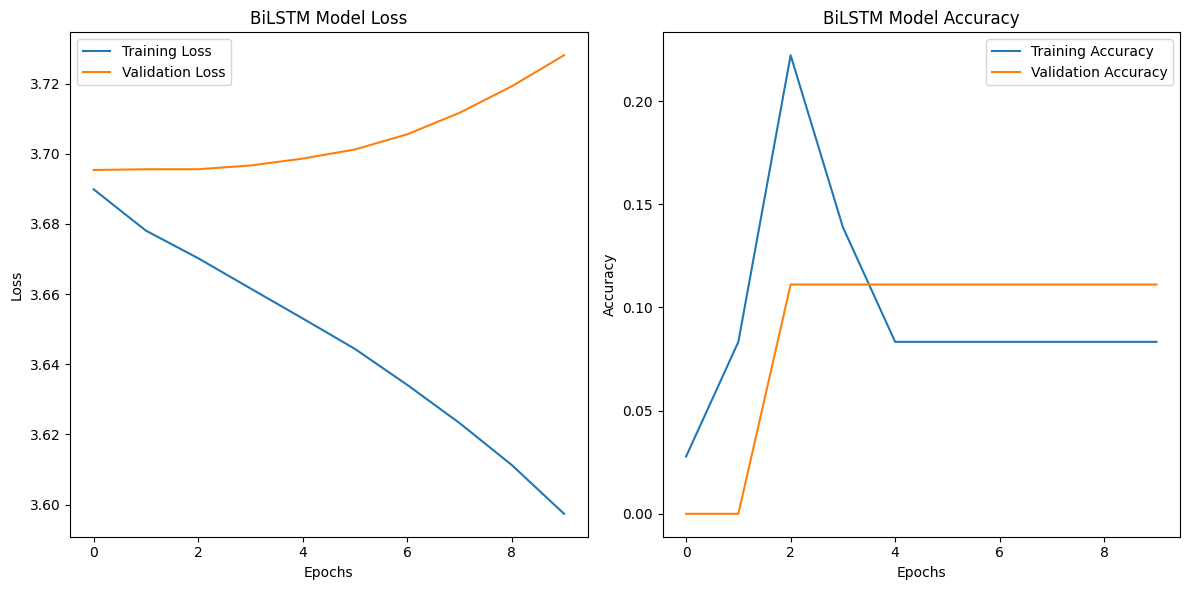

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset
# Assume df is your pandas DataFrame containing 'incomplete_sentence' and 'completion'
# For this example, let's generate some dummy data
# df = pd.read_csv('your_dataset.csv')

# Mock dataset for demonstration
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "I love programming in Python",
    "Artificial intelligence is the future",
    "Machine learning provides systems the ability to learn",
    "Deep learning is a subset of machine learning",
    "Neural networks are the foundation of deep learning",
    "Natural language processing enables computers to understand human language"
]

# Tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define and compile BiLSTM model
def create_bilstm_model():
    model = Sequential([
        Embedding(total_words, 64, input_length=max_sequence_len-1),
        Bidirectional(LSTM(100)),
        Dense(total_words, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create BiLSTM model
bilstm_model = create_bilstm_model()

# Train BiLSTM model
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Plotting BiLSTM model's performance
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('BiLSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


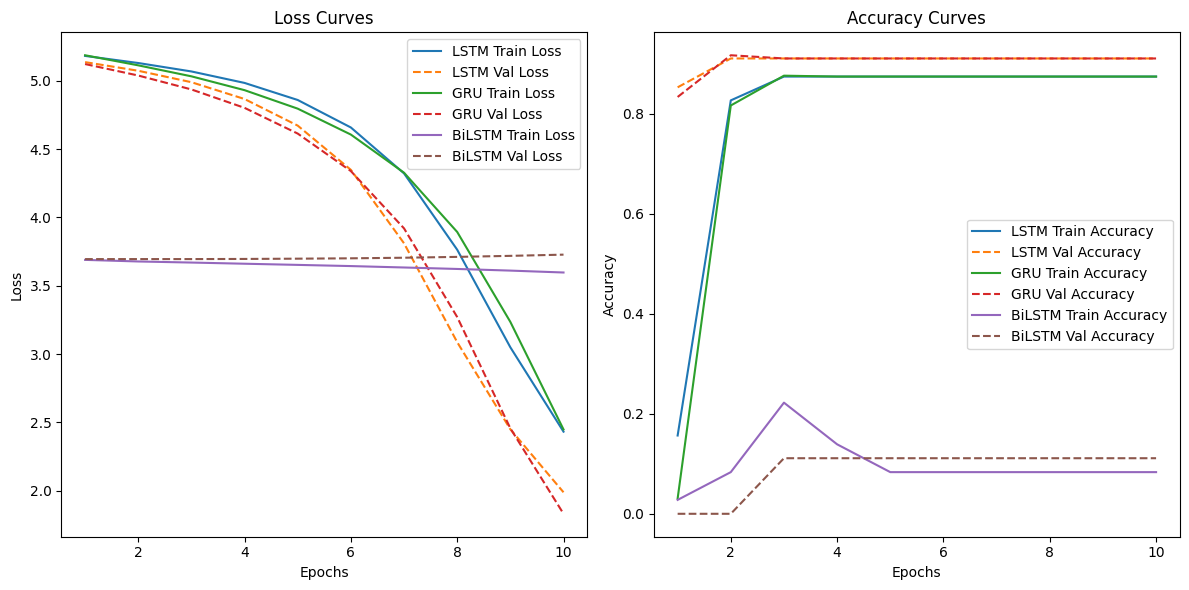

In [14]:
import matplotlib.pyplot as plt

# Example data: replace these with your actual data
epochs = list(range(1, 11))  # Assuming 10 epochs

# LSTM data
lstm_train_loss = [5.1827, 5.1308, 5.0690, 4.9850, 4.8601, 4.6588, 4.3227, 3.7642, 3.0498, 2.4324]
lstm_val_loss = [5.1373, 5.0740, 4.9903, 4.8671, 4.6725, 4.3488, 3.8110, 3.0875, 2.4498, 1.9887]
lstm_train_accuracy = [0.1565, 0.8265, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741]
lstm_val_accuracy = [0.8526, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103]

# GRU data
gru_train_loss = [5.1875, 5.1137, 5.0333, 4.9320, 4.7966, 4.6069, 4.3278, 3.8941, 3.2357, 2.4485]
gru_val_loss = [5.1232, 5.0392, 4.9373, 4.8025, 4.6142, 4.3396, 3.9203, 3.2713, 2.4566, 1.8312]
gru_train_accuracy = [0.0306, 0.8163, 0.8759, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741, 0.8741]
gru_val_accuracy = [0.8333, 0.9167, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103, 0.9103]

# BiLSTM data
bilstm_train_loss = [3.6898, 3.6781, 3.6702, 3.6616, 3.6531, 3.6444, 3.6341, 3.6233, 3.6113, 3.5974]
bilstm_val_loss = [3.6954, 3.6956, 3.6956, 3.6966, 3.6986, 3.7012, 3.7055, 3.7117, 3.7192, 3.7281]
bilstm_train_accuracy = [0.0278, 0.0833, 0.2222, 0.1389, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833]
bilstm_val_accuracy = [0.0000, 0.0000, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111]

# Plot loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, lstm_train_loss, label='LSTM Train Loss')
plt.plot(epochs, lstm_val_loss, label='LSTM Val Loss', linestyle='--')
plt.plot(epochs, gru_train_loss, label='GRU Train Loss')
plt.plot(epochs, gru_val_loss, label='GRU Val Loss', linestyle='--')
plt.plot(epochs, bilstm_train_loss, label='BiLSTM Train Loss')
plt.plot(epochs, bilstm_val_loss, label='BiLSTM Val Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, lstm_train_accuracy, label='LSTM Train Accuracy')
plt.plot(epochs, lstm_val_accuracy, label='LSTM Val Accuracy', linestyle='--')
plt.plot(epochs, gru_train_accuracy, label='GRU Train Accuracy')
plt.plot(epochs, gru_val_accuracy, label='GRU Val Accuracy', linestyle='--')
plt.plot(epochs, bilstm_train_accuracy, label='BiLSTM Train Accuracy')
plt.plot(epochs, bilstm_val_accuracy, label='BiLSTM Val Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()
